# 데이터 전처리

In [447]:
import pandas as pd
import numpy as np

In [448]:
path = "./Data/서울시 부동산 실거래가 정보(2022~2025).csv"
df = pd.read_csv(path, encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235671 entries, 0 to 235670
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              235671 non-null  int64  
 1   자치구코드             235671 non-null  int64  
 2   자치구명              235670 non-null  object 
 3   법정동코드             235671 non-null  int64  
 4   법정동명              235671 non-null  object 
 5   지번구분              224553 non-null  float64
 6   지번구분명             224553 non-null  object 
 7   본번                224555 non-null  object 
 8   부번                224555 non-null  object 
 9   건물명               224535 non-null  object 
 10  계약일               235671 non-null  int64  
 11  물건금액(만원)          235671 non-null  int64  
 12  건물면적(㎡)           235671 non-null  float64
 13  토지면적(㎡)           230520 non-null  float64
 14  층                 224577 non-null  float64
 15  권리구분              1726 non-null    object 
 16  취소일               12

/var/folders/5p/79nsvsf97wd_rz32b3fftzh80000gn/T/ipykernel_56082/3562862516.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='cp949')


In [449]:
df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"


In [450]:
df.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')

## Null 값 확인

In [451]:
df.isnull().sum()

접수연도                     0
자치구코드                    0
자치구명                     1
법정동코드                    0
법정동명                     0
지번구분                 11118
지번구분명                11118
본번                   11116
부번                   11116
건물명                  11136
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)               5151
층                    11094
권리구분                233945
취소일                 223159
건축년도                  1236
건물용도                     0
신고구분                   238
신고한 개업공인중개사 시군구명     41877
dtype: int64

### 접수연도

In [452]:
df['접수연도'].unique()

array([2025, 2024, 2023, 2022])

### 자치구명 & 법정동명

In [453]:
# '자치구명'이 Null(NaN)인 행만 필터링
null_values = df[df['자치구명'].isnull()]

# 결과 출력
null_values

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
95928,2024,26230,NaN,10100,미아동,1.0,대지,,,2020년 2차 행복주택 입주자 모집,...,42450,72.13,0.0,5.0,분양권,NaN,0.0,아파트,중개거래,부산 부산진구


In [454]:
df[df['자치구코드'] == 26230]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
95928,2024,26230,NaN,10100,미아동,1.0,대지,,,2020년 2차 행복주택 입주자 모집,...,42450,72.13,0.0,5.0,분양권,NaN,0.0,아파트,중개거래,부산 부산진구


In [455]:
df[df['법정동명']=='미아동'].head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
289,2025,11305,강북구,10100,미아동,1.0,대지,130.0,87.0,삼운빌라3차,...,17000,43.800,22.0,-1.0,NaN,NaN,1994.0,연립다세대,직거래,NaN
393,2025,11305,강북구,10100,미아동,1.0,대지,1353.0,0.0,에스케이북한산시티,...,74000,84.760,0.0,17.0,NaN,NaN,2004.0,아파트,중개거래,서울 강북구
400,2025,11305,강북구,10100,미아동,1.0,대지,1353.0,0.0,에스케이북한산시티,...,58000,59.980,0.0,6.0,NaN,NaN,2004.0,아파트,중개거래,서울 강북구
401,2025,11305,강북구,10100,미아동,1.0,대지,308.0,11.0,은혜쉐르빌,...,23750,39.630,24.0,3.0,NaN,NaN,2016.0,연립다세대,중개거래,서울 강북구
562,2025,11305,강북구,10100,미아동,1.0,대지,1356.0,0.0,경남아너스빌(1356-0),...,63000,59.964,0.0,19.0,NaN,NaN,2003.0,아파트,중개거래,서울 강북구


In [456]:
df.drop(df[df['자치구코드'] == 26230].index, inplace=True)

In [457]:
df[df['자치구코드'] == 26230]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명


- 자치구명 null값(1개) 확인해보니 자치구코드는 26230(부산), 법정동명은 미아동이라서 잘못된 데이터로 판단, 해당 행 제거

### 지번구분

In [458]:
# 지번 구분 확인
df['지번구분'].value_counts()

지번구분
1.0    224209
3.0       292
2.0        51
Name: count, dtype: int64

In [459]:
# 지번 구분명 확인
df['지번구분명'].value_counts()

지번구분명
대지    224209
블럭       292
산         51
Name: count, dtype: int64

In [460]:
null_values = df[df['지번구분'].isnull()]

In [461]:
null_values.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.0,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
55,2025,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,41163,85.90,110.0,NaN,NaN,NaN,1985.0,단독다가구,중개거래,서울 성북구
91,2025,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,...,80000,123.45,83.0,NaN,NaN,NaN,1992.0,단독다가구,직거래,NaN
264,2025,11410,서대문구,11000,북아현동,NaN,NaN,NaN,NaN,NaN,...,97180,26.45,59.0,NaN,NaN,NaN,1941.0,단독다가구,중개거래,"서울 마포구, 서울 서대문구"
433,2025,11320,도봉구,10600,방학동,NaN,NaN,NaN,NaN,NaN,...,34000,68.02,99.0,NaN,NaN,NaN,1985.0,단독다가구,중개거래,서울 도봉구


- 대지, 블럭, 산 > 지번구분/지번구분명 삭제 (이유는 나중에)

In [462]:
# 우선 자치구코드, 법정동 코드, 지번구분, 지번구분명 컬럼 제거
df_drop = df.drop(columns=['자치구코드', '법정동코드', '지번구분', '지번구분명'])
df_drop.head()

,접수연도,자치구명,법정동명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,도봉구,방학동,638.0,10.0,한신빌라(638-10),20250117,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2025,은평구,역촌동,NaN,NaN,NaN,20250117,39620,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
2,2025,강서구,등촌동,628.0,13.0,현대프린스텔,20250117,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,관악구,신림동,1639.0,51.0,푸리마타운,20250117,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,구로구,고척동,339.0,0.0,고척파크푸르지오,20250117,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"


In [463]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235670 entries, 0 to 235670
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              235670 non-null  int64  
 1   자치구명              235670 non-null  object 
 2   법정동명              235670 non-null  object 
 3   본번                224554 non-null  object 
 4   부번                224554 non-null  object 
 5   건물명               224534 non-null  object 
 6   계약일               235670 non-null  int64  
 7   물건금액(만원)          235670 non-null  int64  
 8   건물면적(㎡)           235670 non-null  float64
 9   토지면적(㎡)           230519 non-null  float64
 10  층                 224576 non-null  float64
 11  권리구분              1725 non-null    object 
 12  취소일               12512 non-null   float64
 13  건축년도              234434 non-null  float64
 14  건물용도              235670 non-null  object 
 15  신고구분              235432 non-null  object 
 16  신고한 개업공인중개사 시군구명  193793 

In [464]:
df_drop.isnull().sum()

접수연도                     0
자치구명                     0
법정동명                     0
본번                   11116
부번                   11116
건물명                  11136
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)               5151
층                    11094
권리구분                233945
취소일                 223158
건축년도                  1236
건물용도                     0
신고구분                   238
신고한 개업공인중개사 시군구명     41877
dtype: int64

### 본번 / 부번

In [465]:
null_values = df[df['본번'].isnull()]
null_values.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.0,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
55,2025,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,41163,85.90,110.0,NaN,NaN,NaN,1985.0,단독다가구,중개거래,서울 성북구
91,2025,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,...,80000,123.45,83.0,NaN,NaN,NaN,1992.0,단독다가구,직거래,NaN
264,2025,11410,서대문구,11000,북아현동,NaN,NaN,NaN,NaN,NaN,...,97180,26.45,59.0,NaN,NaN,NaN,1941.0,단독다가구,중개거래,"서울 마포구, 서울 서대문구"
433,2025,11320,도봉구,10600,방학동,NaN,NaN,NaN,NaN,NaN,...,34000,68.02,99.0,NaN,NaN,NaN,1985.0,단독다가구,중개거래,서울 도봉구


In [466]:
null_index = df[df['본번'].isnull()].index
null_index

Index([     1,     55,     91,    264,    433,    458,    480,    510,    576,
          582,
       ...
       235626, 235630, 235632, 235637, 235638, 235640, 235642, 235645, 235666,
       235668],
      dtype='int64', length=11116)

In [467]:
null_index2 = df[df['부번'].isnull()].index
null_index2

Index([     1,     55,     91,    264,    433,    458,    480,    510,    576,
          582,
       ...
       235626, 235630, 235632, 235637, 235638, 235640, 235642, 235645, 235666,
       235668],
      dtype='int64', length=11116)

In [468]:
for i in range(len(null_index)):
    if null_index[i] != null_index2[i]:
        print(null_index[i], null_index2[i])

In [469]:
# 본번 null값인 행 = 부번 null값인 행
# 본번 / 부번이 없는 값의 건물명 확인
null_building = null_values['건물명'].isnull().value_counts()
null_building

건물명
True     11091
False       25
Name: count, dtype: int64

- 11091개는 본번+부번+건물명 다 null
- 25개는 확인필요

In [470]:
false_building_data = null_values[null_values['건물명'].notnull()]
false_building_data['건물명'].value_counts()

건물명
자연누리 오피스텔        19
힐스테이트 서초 젠트리스     6
Name: count, dtype: int64

- 해당 2건물의 본번 / 부번은 채우기로 함
- 서울특별시 서초구 신원동 662 -> 서초구 자연누리 오피스텔
- 서울특별시 서초구 신원동 557 -> 서초 힐스테이트 젠트리스

In [471]:
df_drop.loc[df_drop['건물명'] == '자연누리 오피스텔', '본번'] = 662
df_drop.loc[df_drop['건물명'] == '자연누리 오피스텔', '부번'] = 0
df_drop.loc[df_drop['건물명'] == '힐스테이트 서초 젠트리스', '본번'] = 557
df_drop.loc[df_drop['건물명'] == '힐스테이트 서초 젠트리스', '부번'] = 0

In [472]:
df_drop[df_drop['건물명'] == '자연누리 오피스텔']

,접수연도,자치구명,법정동명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
93042,2024,서초구,신원동,662,0,자연누리 오피스텔,20240127,16000,21.39,27.58,2.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구
99829,2023,서초구,신원동,662,0,자연누리 오피스텔,20231223,16000,21.39,27.58,2.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구
102580,2023,서초구,신원동,662,0,자연누리 오피스텔,20231201,16000,21.39,27.58,2.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 강남구
102724,2023,서초구,신원동,662,0,자연누리 오피스텔,20231130,16000,21.39,27.58,2.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 강남구
102884,2023,서초구,신원동,662,0,자연누리 오피스텔,20231129,15800,21.39,27.58,2.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구
103197,2023,서초구,신원동,662,0,자연누리 오피스텔,20231127,16000,21.39,27.58,3.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 강남구
112586,2023,서초구,신원동,662,0,자연누리 오피스텔,20231004,15800,21.39,27.58,3.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구
115561,2023,서초구,신원동,662,0,자연누리 오피스텔,20230916,16700,21.39,27.58,3.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구
150442,2023,서초구,신원동,662,0,자연누리 오피스텔,20230415,16000,21.39,27.58,3.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구
150464,2023,서초구,신원동,662,0,자연누리 오피스텔,20230415,15500,21.39,27.58,2.0,NaN,NaN,2015.0,오피스텔,중개거래,서울 서초구


In [473]:
df_drop[df_drop['건물명'] == '힐스테이트 서초 젠트리스']

,접수연도,자치구명,법정동명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
114408,2023,서초구,신원동,557,0,힐스테이트 서초 젠트리스,20230921,161000,84.95,0.0,5.0,NaN,NaN,2014.0,아파트,중개거래,서울 서초구
115527,2023,서초구,신원동,557,0,힐스테이트 서초 젠트리스,20230916,190000,101.90,0.0,3.0,NaN,NaN,2014.0,아파트,중개거래,서울 서초구
116920,2023,서초구,신원동,557,0,힐스테이트 서초 젠트리스,20230911,163000,84.99,0.0,5.0,NaN,NaN,2014.0,아파트,중개거래,서울 서초구
149620,2023,서초구,신원동,557,0,힐스테이트 서초 젠트리스,20230420,160000,84.95,0.0,2.0,NaN,NaN,2014.0,아파트,중개거래,서울 서초구
178235,2022,서초구,신원동,557,0,힐스테이트 서초 젠트리스,20220928,173000,84.95,0.0,8.0,NaN,NaN,2014.0,아파트,중개거래,서울 서초구
192313,2022,서초구,신원동,557,0,힐스테이트 서초 젠트리스,20220623,204000,101.90,0.0,5.0,NaN,NaN,2014.0,아파트,중개거래,서울 서초구


- 본번 & 부번 null 값 제거

In [474]:
df_drop.dropna(subset=['본번'], inplace=True)
df_drop.isnull().sum()

접수연도                     0
자치구명                     0
법정동명                     0
본번                       0
부번                       0
건물명                     45
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)               5151
층                        3
권리구분                222854
취소일                 213363
건축년도                  1213
건물용도                     0
신고구분                   168
신고한 개업공인중개사 시군구명     40250
dtype: int64

In [475]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224579 entries, 0 to 235670
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              224579 non-null  int64  
 1   자치구명              224579 non-null  object 
 2   법정동명              224579 non-null  object 
 3   본번                224579 non-null  object 
 4   부번                224579 non-null  object 
 5   건물명               224534 non-null  object 
 6   계약일               224579 non-null  int64  
 7   물건금액(만원)          224579 non-null  int64  
 8   건물면적(㎡)           224579 non-null  float64
 9   토지면적(㎡)           219428 non-null  float64
 10  층                 224576 non-null  float64
 11  권리구분              1725 non-null    object 
 12  취소일               11216 non-null   float64
 13  건축년도              223366 non-null  float64
 14  건물용도              224579 non-null  object 
 15  신고구분              224411 non-null  object 
 16  신고한 개업공인중개사 시군구명  184329 

- 본번 + 부번 int로 변환

In [476]:
def to_int(value):
    value = str(value).split(".")[0].strip()
    return int(value) if value.isdigit() else pd.NA


df_drop["본번"] = df_drop["본번"].apply(to_int)
df_drop["부번"] = df_drop["부번"].apply(to_int)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224579 entries, 0 to 235670
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              224579 non-null  int64  
 1   자치구명              224579 non-null  object 
 2   법정동명              224579 non-null  object 
 3   본번                224579 non-null  int64  
 4   부번                224579 non-null  int64  
 5   건물명               224534 non-null  object 
 6   계약일               224579 non-null  int64  
 7   물건금액(만원)          224579 non-null  int64  
 8   건물면적(㎡)           224579 non-null  float64
 9   토지면적(㎡)           219428 non-null  float64
 10  층                 224576 non-null  float64
 11  권리구분              1725 non-null    object 
 12  취소일               11216 non-null   float64
 13  건축년도              223366 non-null  float64
 14  건물용도              224579 non-null  object 
 15  신고구분              224411 non-null  object 
 16  신고한 개업공인중개사 시군구명  184329 

In [477]:
df_drop.head()

,접수연도,자치구명,법정동명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,도봉구,방학동,638,10,한신빌라(638-10),20250117,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
2,2025,강서구,등촌동,628,13,현대프린스텔,20250117,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,관악구,신림동,1639,51,푸리마타운,20250117,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,구로구,고척동,339,0,고척파크푸르지오,20250117,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"
5,2025,광진구,중곡동,73,70,욱현하이브(73-70),20250117,19800,44.96,33.00,3.0,NaN,NaN,2009.0,연립다세대,중개거래,서울 동작구


### 건물명

In [478]:
df_drop['건물명'].value_counts()

건물명
현대               851
헬리오시티            760
두산               743
파크리오             593
신동아              516
                ... 
(170-7)            1
영진파크빌(437-26)      1
오름하우스              1
아성빌라(409-4)        1
(1691-17)          1
Name: count, Length: 36022, dtype: int64

In [479]:
df_drop['건물명'].isnull().sum()

45

- 건물명이 아닌 주소로 추정되는 값들이 적혀 있으므로 주소로 카카오 API에서 건물명 가져오기
- 우선 null 값은 '알수없음'으로 대체

In [480]:
df_drop['건물명'].fillna('알수없음', inplace=True)
df_drop.isnull().sum()

/var/folders/5p/79nsvsf97wd_rz32b3fftzh80000gn/T/ipykernel_56082/2836428711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_drop['건물명'].fillna('알수없음', inplace=True)


접수연도                     0
자치구명                     0
법정동명                     0
본번                       0
부번                       0
건물명                      0
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)               5151
층                        3
권리구분                222854
취소일                 213363
건축년도                  1213
건물용도                     0
신고구분                   168
신고한 개업공인중개사 시군구명     40250
dtype: int64

### 계약일

In [481]:
df_drop['계약일'].value_counts().sort_index()

계약일
20090219      1
20130123      1
20160426      1
20160620      1
20170712      1
           ... 
20250113     54
20250114    107
20250115     56
20250116     67
20250117     16
Name: count, Length: 1282, dtype: int64

- 계약일 기준으로 가격 예측 가능
- 계약연도, 계약월, 계약일 로 split

In [482]:
df_drop.rename(columns={'계약일': '계약날짜'}, inplace=True)
df_drop.columns

Index(['접수연도', '자치구명', '법정동명', '본번', '부번', '건물명', '계약날짜', '물건금액(만원)',
       '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일', '건축년도', '건물용도', '신고구분',
       '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [483]:

df_drop['계약연도'] = df_drop['계약날짜'].astype(str).str[:4]   # 앞 4자리 (연도)
df_drop['계약월'] = df_drop['계약날짜'].astype(str).str[4:6]   # 중간 2자리 (월)
df_drop['계약일'] = df_drop['계약날짜'].astype(str).str[6:8]   # 마지막 2자리 (일)

# 숫자로 변환
df_drop[['계약연도', '계약월', '계약일']] = df_drop[['계약연도', '계약월', '계약일']].astype(int)

df_drop.head()

,접수연도,자치구명,법정동명,본번,부번,건물명,계약날짜,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,계약연도,계약월,계약일
0,2025,도봉구,방학동,638,10,한신빌라(638-10),20250117,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구,2025,1,17
2,2025,강서구,등촌동,628,13,현대프린스텔,20250117,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구,2025,1,17
3,2025,관악구,신림동,1639,51,푸리마타운,20250117,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구,2025,1,17
4,2025,구로구,고척동,339,0,고척파크푸르지오,20250117,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구",2025,1,17
5,2025,광진구,중곡동,73,70,욱현하이브(73-70),20250117,19800,44.96,33.00,3.0,NaN,NaN,2009.0,연립다세대,중개거래,서울 동작구,2025,1,17


In [484]:
# 기존 컬럼 삭제
df_drop = df_drop.drop(columns=['계약날짜'])

### 물건금액(만원)

- 거래량 top 30 주거지의 가격 확인

In [485]:
value_counts = df_drop['물건금액(만원)'].value_counts().sort_values().tail(30).sort_index()

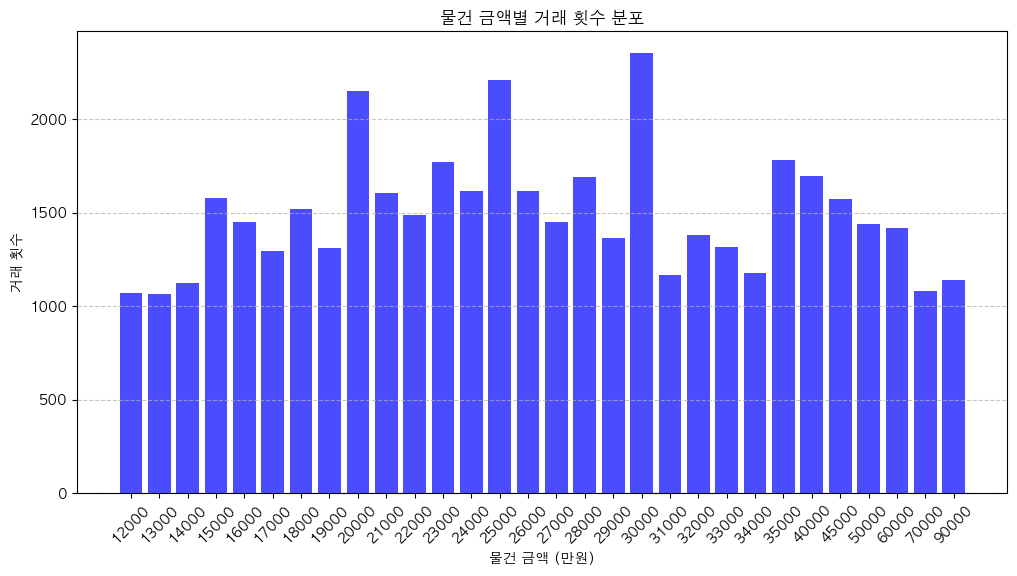

In [486]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (애플 고딕)

# 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 바 차트 그리기
plt.figure(figsize=(12, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='blue', alpha=0.7)

# 그래프 설정
plt.xlabel("물건 금액 (만원)")
plt.ylabel("거래 횟수")
plt.title("물건 금액별 거래 횟수 분포")
plt.xticks(rotation=45)  # X축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

- 3억원대 거래가 가장 많음

### 건물면적 & 토지면적

In [487]:
# null 확인
print(df_drop['건물면적(㎡)'].isnull().sum())
print(df_drop['토지면적(㎡)'].isnull().sum())

0
5151


- 토지면적 컬럼 제외

In [488]:
df_drop = df_drop.drop(columns=['토지면적(㎡)'])
df_drop.columns

Index(['접수연도', '자치구명', '법정동명', '본번', '부번', '건물명', '물건금액(만원)', '건물면적(㎡)', '층',
       '권리구분', '취소일', '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명', '계약연도',
       '계약월', '계약일'],
      dtype='object')

In [489]:
df_drop.isnull().sum()

접수연도                     0
자치구명                     0
법정동명                     0
본번                       0
부번                       0
건물명                      0
물건금액(만원)                 0
건물면적(㎡)                  0
층                        3
권리구분                222854
취소일                 213363
건축년도                  1213
건물용도                     0
신고구분                   168
신고한 개업공인중개사 시군구명     40250
계약연도                     0
계약월                      0
계약일                      0
dtype: int64

### 층

- null 확인

In [490]:
print(df_drop['층'].isnull().sum())

3


In [491]:
null_values = df_drop[df_drop['층'].isnull()]
null_values.head()

,접수연도,자치구명,법정동명,본번,부번,건물명,물건금액(만원),건물면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,계약연도,계약월,계약일
186761,2022,구로구,구로동,807,8,(807-8),130000,513.00,NaN,NaN,20230420.0,1995.0,단독다가구,직거래,NaN,2022,7,25
194277,2022,용산구,용산동2가,26,6,진흥푸르지오,255000,230.72,NaN,NaN,NaN,2007.0,단독다가구,중개거래,서울 용산구,2022,6,15
206943,2022,강남구,역삼동,794,16,(794-16),292000,454.45,NaN,NaN,NaN,2005.0,단독다가구,중개거래,서울 강남구,2022,4,30


- 해당 행 삭제

In [492]:
df_drop.dropna(subset=['층'], inplace=True)
df_drop.isnull().sum()

접수연도                     0
자치구명                     0
법정동명                     0
본번                       0
부번                       0
건물명                      0
물건금액(만원)                 0
건물면적(㎡)                  0
층                        0
권리구분                222851
취소일                 213361
건축년도                  1213
건물용도                     0
신고구분                   168
신고한 개업공인중개사 시군구명     40249
계약연도                     0
계약월                      0
계약일                      0
dtype: int64

In [493]:
df_drop['층'].value_counts()

층
 2.0     28598
 3.0     27868
 4.0     25058
 5.0     20562
 6.0     13349
         ...  
 60.0        3
 56.0        3
 65.0        2
-3.0         2
 59.0        2
Name: count, Length: 70, dtype: int64

- float -> int로 변환

In [494]:
df_drop['층'] = df_drop['층'].astype(int)
df_drop['층'].value_counts()

층
 2     28598
 3     27868
 4     25058
 5     20562
 6     13349
       ...  
 60        3
 56        3
 65        2
-3         2
 59        2
Name: count, Length: 70, dtype: int64

In [495]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224576 entries, 0 to 235670
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              224576 non-null  int64  
 1   자치구명              224576 non-null  object 
 2   법정동명              224576 non-null  object 
 3   본번                224576 non-null  int64  
 4   부번                224576 non-null  int64  
 5   건물명               224576 non-null  object 
 6   물건금액(만원)          224576 non-null  int64  
 7   건물면적(㎡)           224576 non-null  float64
 8   층                 224576 non-null  int64  
 9   권리구분              1725 non-null    object 
 10  취소일               11215 non-null   float64
 11  건축년도              223363 non-null  float64
 12  건물용도              224576 non-null  object 
 13  신고구분              224408 non-null  object 
 14  신고한 개업공인중개사 시군구명  184327 non-null  object 
 15  계약연도              224576 non-null  int64  
 16  계약월               224576 

### 권리구분

In [496]:
df_drop['권리구분'].value_counts()

권리구분
입주권    1035
분양권     690
Name: count, dtype: int64

In [497]:
df_drop['권리구분'].isnull().sum()

222851

- 입주권:1035 / 분양권:690 / null:222851 > 컬럼 제거

In [498]:
df_drop = df_drop.drop(columns=['권리구분'])
df_drop.columns

Index(['접수연도', '자치구명', '법정동명', '본번', '부번', '건물명', '물건금액(만원)', '건물면적(㎡)', '층',
       '취소일', '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명', '계약연도', '계약월',
       '계약일'],
      dtype='object')

### 취소일

In [499]:
df_drop['취소일'].isnull().sum()

213361

- null 값 많음, 컬럼 제거

In [500]:
df_drop = df_drop.drop(columns=['취소일'])
df_drop.columns

Index(['접수연도', '자치구명', '법정동명', '본번', '부번', '건물명', '물건금액(만원)', '건물면적(㎡)', '층',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명', '계약연도', '계약월', '계약일'],
      dtype='object')

### 건축년도

In [501]:
null_value = df_drop[df_drop['건축년도'].isnull()]

In [502]:
null_value = df_drop[df_drop['건축년도'].isnull()]
null_value.head()

,접수연도,자치구명,법정동명,본번,부번,건물명,물건금액(만원),건물면적(㎡),층,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,계약연도,계약월,계약일
125,2025,마포구,신공덕동,5,75,갑을명가시티1,14900,19.73,18,NaN,오피스텔,중개거래,서울 마포구,2025,1,15
238,2025,동대문구,용두동,104,3,동대문 푸르지오시티,19100,23.47,19,NaN,오피스텔,중개거래,서울 동대문구,2025,1,14
252,2025,송파구,문정동,618,0,파크하비오,67000,58.84,5,NaN,오피스텔,중개거래,"서울 강남구, 서울 송파구",2025,1,13
762,2025,송파구,문정동,618,0,파크하비오,48000,48.93,15,NaN,오피스텔,중개거래,서울 송파구,2025,1,7
870,2025,송파구,문정동,618,0,파크하비오,53500,54.31,5,NaN,오피스텔,중개거래,서울 송파구,2025,1,6


- null 값 = 아직 안 지어진 건물로 추정, 2025로 값 대체

In [503]:
df_drop['건축년도'].fillna(2025, inplace=True)
df_drop['건축년도'].value_counts().sort_index()

/var/folders/5p/79nsvsf97wd_rz32b3fftzh80000gn/T/ipykernel_56082/3348383677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_drop['건축년도'].fillna(2025, inplace=True)


건축년도
0.0        1725
1956.0        1
1961.0        4
1965.0       10
1966.0        4
          ...  
2021.0     7856
2022.0    13271
2023.0     6175
2024.0     1592
2025.0     1213
Name: count, Length: 64, dtype: int64

- float > int 형 변환

In [504]:
df_drop['건축년도'] = df_drop['건축년도'].astype(int)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224576 entries, 0 to 235670
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              224576 non-null  int64  
 1   자치구명              224576 non-null  object 
 2   법정동명              224576 non-null  object 
 3   본번                224576 non-null  int64  
 4   부번                224576 non-null  int64  
 5   건물명               224576 non-null  object 
 6   물건금액(만원)          224576 non-null  int64  
 7   건물면적(㎡)           224576 non-null  float64
 8   층                 224576 non-null  int64  
 9   건축년도              224576 non-null  int64  
 10  건물용도              224576 non-null  object 
 11  신고구분              224408 non-null  object 
 12  신고한 개업공인중개사 시군구명  184327 non-null  object 
 13  계약연도              224576 non-null  int64  
 14  계약월               224576 non-null  int64  
 15  계약일               224576 non-null  int64  
dtypes: float64(1), int64(9), 

### 건물 용도

In [505]:
df_drop.isnull().sum()

접수연도                    0
자치구명                    0
법정동명                    0
본번                      0
부번                      0
건물명                     0
물건금액(만원)                0
건물면적(㎡)                 0
층                       0
건축년도                    0
건물용도                    0
신고구분                  168
신고한 개업공인중개사 시군구명    40249
계약연도                    0
계약월                     0
계약일                     0
dtype: int64

### 신고구분

In [506]:
df_drop['신고구분'].isnull().sum()

168

In [507]:
df_drop['신고구분'].value_counts()

신고구분
중개거래    184436
직거래      39972
Name: count, dtype: int64

- null > '신고없음'으로 대체

In [508]:
df_drop['신고구분'].fillna('신고없음', inplace=True)
df_drop['신고구분'].value_counts()

/var/folders/5p/79nsvsf97wd_rz32b3fftzh80000gn/T/ipykernel_56082/456936704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_drop['신고구분'].fillna('신고없음', inplace=True)


신고구분
중개거래    184436
직거래      39972
신고없음       168
Name: count, dtype: int64

### 신고한 개업공인중개사 시군구명

In [509]:
df_drop['신고한 개업공인중개사 시군구명'].isnull().sum()

40249

- null > '없음'으로 대체

In [510]:
df_drop['신고한 개업공인중개사 시군구명'].fillna('없음', inplace=True)
df_drop.isnull().sum()

/var/folders/5p/79nsvsf97wd_rz32b3fftzh80000gn/T/ipykernel_56082/1192927733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_drop['신고한 개업공인중개사 시군구명'].fillna('없음', inplace=True)


접수연도                0
자치구명                0
법정동명                0
본번                  0
부번                  0
건물명                 0
물건금액(만원)            0
건물면적(㎡)             0
층                   0
건축년도                0
건물용도                0
신고구분                0
신고한 개업공인중개사 시군구명    0
계약연도                0
계약월                 0
계약일                 0
dtype: int64

## 카카오 API 활용

### 주소 컬럼 추가
- 서울특별시 + 자치구명 + 법정동명 + 본번 + 부번

In [511]:
df_drop['주소'] = df_drop.apply(lambda row: 
                      f"서울특별시 {row['자치구명']} {row['법정동명']} {row['본번']}" 
                      if row['부번'] == 0 else 
                      f"서울특별시 {row['자치구명']} {row['법정동명']} {row['본번']}-{row['부번']}", 
                      axis=1)
df_drop['주소'].head()

0     서울특별시 도봉구 방학동 638-10
2     서울특별시 강서구 등촌동 628-13
3    서울특별시 관악구 신림동 1639-51
4        서울특별시 구로구 고척동 339
5      서울특별시 광진구 중곡동 73-70
Name: 주소, dtype: object

In [515]:
# 라이브러리 설치
! pip install requests pandas tqdm


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import requests
import time
from tqdm import tqdm

# 🔑 카카오 API 키 입력
KAKAO_API_KEY = "YOUR_KAKAO_API_KEY"
HEADERS = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}